In [1]:
# @title Load modules, load and print dataset
import csv
import numpy as np
import time
import tqdm
import copy
import torch
from sklearn.model_selection import train_test_split

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

# load dataset from github
!wget "https://raw.githubusercontent.com/LaFabrickMassy/Projet-Fablab/main/Miditech/ML/Prix apparts2.csv" -O "Prix apparts.csv"
!ls

# convert dataset to 2 lists:
# X is the list of inputs (surface, floor, balcony, car parking, nb of rooms)
# Y is the list of results (price)
X = []
Y = []

with open("Prix apparts.csv") as fd:
  reader = csv.reader(fd, delimiter = ";")
  # 1st line is title of fields
  line_index = 0
  for l in reader:
    if line_index == 0:
      titles = l
    else:
      values = []
      for i, x in enumerate(l):
        if i == 0:
          res=float(x)
        else:
          values.append(float(x))
      X.append(values)
      Y.append(res)

    line_index += 1


print(f"Dataset is made of {len(X)} entries")
# print dataset
for d in X:
  print(d)


--2024-09-20 11:40:54--  https://raw.githubusercontent.com/LaFabrickMassy/Projet-Fablab/main/Miditech/ML/Prix%20apparts2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2085 (2.0K) [text/plain]
Saving to: ‘Prix apparts.csv’

Prix apparts.csv    100%[===================>]   2.04K  --.-KB/s    in 0s      

2024-09-20 11:40:54 (25.7 MB/s) - ‘Prix apparts.csv’ saved [2085/2085]

'Prix apparts.csv'   sample_data
Dataset is made of 136 entries
[31.0, 4.0, 1.0, 0.0, 1.0]
[35.0, 2.0, 0.0, 1.0, 1.0]
[32.0, 1.0, 1.0, 0.0, 1.0]
[32.0, 1.0, 1.0, 0.0, 1.0]
[22.0, 1.0, 0.0, 0.0, 1.0]
[17.0, 1.0, 0.0, 0.0, 1.0]
[34.0, 3.0, 1.0, 0.0, 1.0]
[32.0, 3.0, 1.0, 0.0, 1.0]
[32.0, 1.0, 0.0, 0.0, 1.0]
[30.0, 1.0, 1.0, 0.0, 1.0]
[25.0, 1.0, 1.0, 1.0, 1.0]
[25.0, 1.0, 1.0, 1.0, 1.0

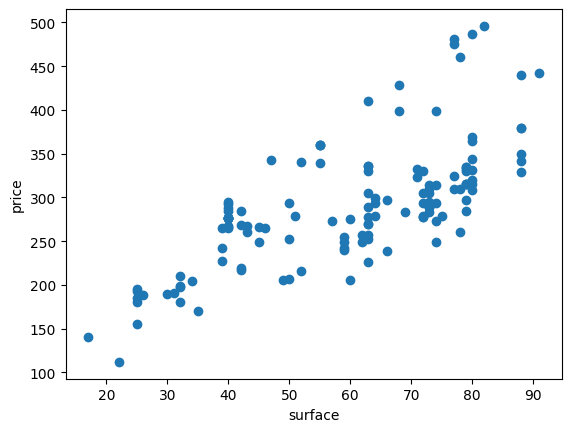

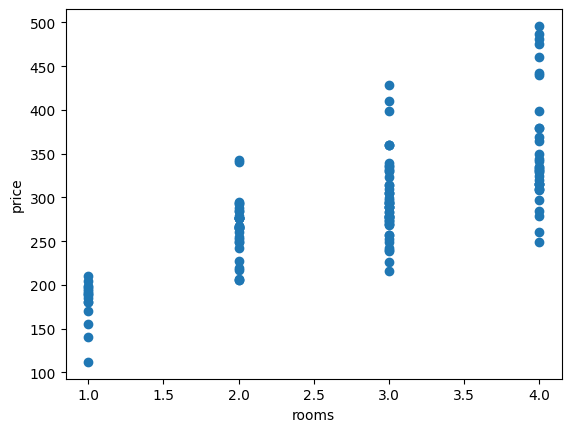

In [2]:
# @title Look at the dataset

import matplotlib.pyplot as plt

# show only price depending on surface
surface = [x[0] for x in X]

# show only price depending on surface
rooms = [x[4] for x in X]

plt.scatter(surface, Y)
plt.xlabel("surface")
plt.ylabel("price")
plt.show()

plt.scatter(rooms, Y)
plt.xlabel("rooms")
plt.ylabel("price")
plt.show()


In [3]:
network_width = 20

class net(torch.nn.Module):

  def __init__(self):
    super(net, self).__init__()

    self.all_layers = torch.nn.Sequential(
      # 1st layer
      torch.nn.Linear(5, network_width),
      torch.nn.ReLU(),
      # 2nd layer
      torch.nn.Linear(network_width, network_width),
      torch.nn.ReLU(),
      # 3rd layer
      #torch.nn.Linear(network_width, network_width),
      #torch.nn.ReLU(),
      # 4th layer
      #torch.nn.Linear(network_width, network_width),
      #torch.nn.ReLU(),
      # output layer
      torch.nn.Linear(network_width, 1),
    )

  def forward(self, x):
    logits = self.all_layers(x).flatten()
    return logits

model = net()

print('The model:')
print(model)
print(model.all_layers[0].weight)
print(model.all_layers[0].bias)

print(model(torch.tensor([1,2,3,4,5], dtype=torch.float32)))



The model:
net(
  (all_layers): Sequential(
    (0): Linear(in_features=5, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)
Parameter containing:
tensor([[ 0.1320,  0.4129, -0.2395, -0.0440, -0.2658],
        [-0.4049, -0.1236, -0.2280,  0.3459, -0.2886],
        [ 0.3631, -0.0554,  0.1219, -0.1775,  0.4439],
        [-0.4407,  0.0297,  0.0755,  0.1516, -0.4379],
        [-0.0261,  0.1816, -0.3028, -0.2988,  0.4441],
        [ 0.0090, -0.3471,  0.2652,  0.0828, -0.2566],
        [-0.1134, -0.3691,  0.1300,  0.3451, -0.3420],
        [-0.3608,  0.3837, -0.0491, -0.2059, -0.3977],
        [-0.3428,  0.3004,  0.1628, -0.3612,  0.0433],
        [-0.1098, -0.0555, -0.3429, -0.2931, -0.3619],
        [-0.4084, -0.2521, -0.1262, -0.1318, -0.2911],
        [ 0.3783, -0.0077, -0.3570,  0.2315, -0.1834],
        [ 0.2354,  0.0928, -0.3715, -0.3526,  0.3394],
   

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([41, 1])) that is different to the input size (torch.Size([41])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

MSE: 10940.90
RMSE: 104.60


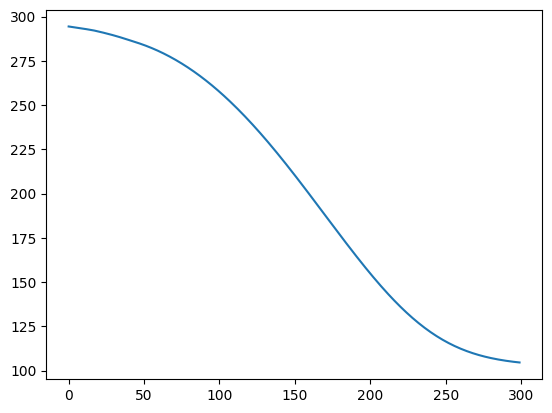

In [4]:
# @title Training loop and print training stats

n_epochs = 300

# Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Train parameters
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

loss_fn = torch.nn.MSELoss()  # mean square error
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(n_epochs):
  model.train()
  with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
    bar.set_description(f"Epoch {epoch}")
    for start in bar:
      # take a batch
      X_batch = X_train[start:start+batch_size]
      y_batch = y_train[start:start+batch_size]
      # forward pass
      y_pred = model(X_batch)
      loss = loss_fn(y_pred, y_batch)
      # backward pass
      optimizer.zero_grad()
      loss.backward()
      # update weights
      optimizer.step()
      # print progress
      bar.set_postfix(mse=float(loss))
  # evaluate accuracy at end of each epoch
  model.eval()
  y_pred = model(X_test)
  mse = loss_fn(y_pred, y_test)
  mse = float(mse)
  history.append(np.sqrt(mse))
  if mse < best_mse:
    best_mse = mse
    best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()



In [5]:
# @title Exemple d'utilisation
a=[78, 5, 1, 0, 1]
prix = model(torch.tensor(a, dtype=torch.float32)).item()
print(f"Le prix d'un appartement de {a[1]} pièces de {a[0]} m2 avec avec {a[2]} balcon, {a[3]} parkings et au {a[4]}e etage est de {prix}")

a=[28, 1, 0, 0, 0]
prix = model(torch.tensor(a, dtype=torch.float32)).item()
print(f"Le prix d'un appartement de {a[1]} pièces de {a[0]} m2 avec avec {a[2]} balcon, {a[3]} parkings et au {a[4]}e etage est de {prix}")

Le prix d'un appartement de 5 pièces de 78 m2 avec avec 1 balcon, 0 parkings et au 1e etage est de 321.153564453125
Le prix d'un appartement de 1 pièces de 28 m2 avec avec 0 balcon, 0 parkings et au 0e etage est de 113.68651580810547
